1. Importing the necessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
#Import file
web = pd.read_csv(r'C:\Users\hp\OneDrive\HNG Internship\Task 0\website_wata.csv')

In [4]:
web.head()

,Page Views,Session Duration,Bounce Rate,Traffic Source,Time on Page,Previous Visits,Conversion Rate
0,5,11.051381,0.230652,Organic,3.890460,3,1.0
1,4,3.429316,0.391001,Social,8.478174,0,1.0
2,4,1.621052,0.397986,Organic,9.636170,2,1.0
3,5,3.629279,0.180458,Organic,2.071925,3,1.0
4,5,4.235843,0.291541,Paid,1.960654,5,1.0


In [5]:
web.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Page Views        2000 non-null   int64  
 1   Session Duration  2000 non-null   float64
 2   Bounce Rate       2000 non-null   float64
 3   Traffic Source    2000 non-null   object 
 4   Time on Page      2000 non-null   float64
 5   Previous Visits   2000 non-null   int64  
 6   Conversion Rate   2000 non-null   float64
dtypes: float64(4), int64(2), object(1)
memory usage: 109.5+ KB


2. Data cleaning

In [6]:
#Check for missing values
#Check for sum of missing values.
missing_values= web.isnull().sum()
print(missing_values)

Page Views          0
Session Duration    0
Bounce Rate         0
Traffic Source      0
Time on Page        0
Previous Visits     0
Conversion Rate     0
dtype: int64


3. Conducting EDA

In [7]:
web.describe()

,Page Views,Session Duration,Bounce Rate,Time on Page,Previous Visits,Conversion Rate
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,4.950500,3.022045,0.284767,4.027439,1.978500,0.982065
std,2.183903,3.104518,0.159781,2.887422,1.432852,0.065680
min,0.000000,0.003613,0.007868,0.068515,0.000000,0.343665
25%,3.000000,0.815828,0.161986,1.935037,1.000000,1.000000
50%,5.000000,1.993983,0.266375,3.315316,2.000000,1.000000
75%,6.000000,4.197569,0.388551,5.414627,3.000000,1.000000
max,14.000000,20.290516,0.844939,24.796182,9.000000,1.000000


           1.Traffic Source Performance

In [8]:
#Goal: Identify which traffic source (Organic, Social, Paid) drives the most visitors and has the best conversion rates.
web["Traffic Source"].value_counts()


Traffic Source
Organic     786
Paid        428
Referral    301
Social      269
Direct      216
Name: count, dtype: int64

In [9]:
#The average conversion rate per traffic source: identify which source leads to the highest conversions.
web.groupby("Traffic Source")["Conversion Rate"].mean()

Traffic Source
Direct      0.978679
Organic     0.982282
Paid        0.979009
Referral    0.987727
Social      0.982679
Name: Conversion Rate, dtype: float64

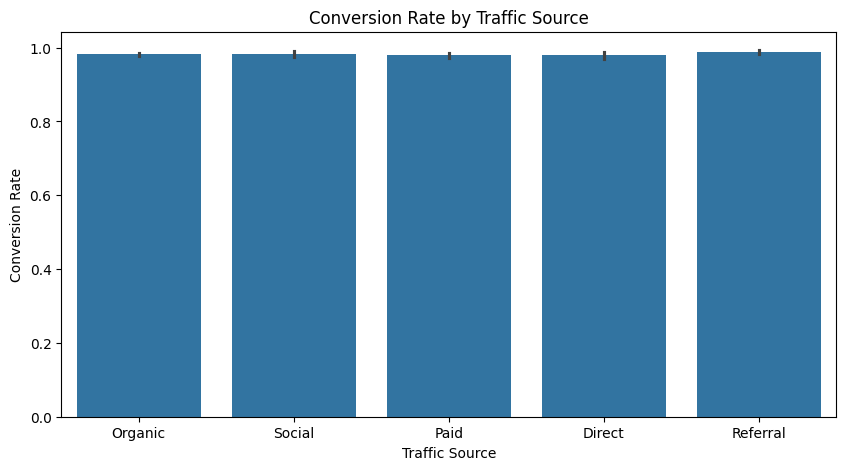

In [11]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.barplot(x=web["Traffic Source"], y=web["Conversion Rate"])
plt.title("Conversion Rate by Traffic Source")
plt.show()

        2.User Behavior vs. Conversions

In [12]:
# Goal: Analyze how session duration, page views, and time on page impact conversions.
web.groupby("Conversion Rate")[["Session Duration", "Page Views", "Time on Page"]].mean()

,Session Duration,Page Views,Time on Page
Conversion Rate,,,
0.343665,0.432437,4.000000,1.398358
0.402910,0.870092,0.000000,0.266102
0.468486,0.453597,5.000000,0.327199
0.506747,1.805000,2.000000,0.742666
0.508227,0.242485,3.000000,1.722425
...,...,...,...
0.997645,1.273818,1.000000,3.399025
0.997793,0.169563,4.000000,3.041127
0.998369,4.345933,1.000000,2.452760


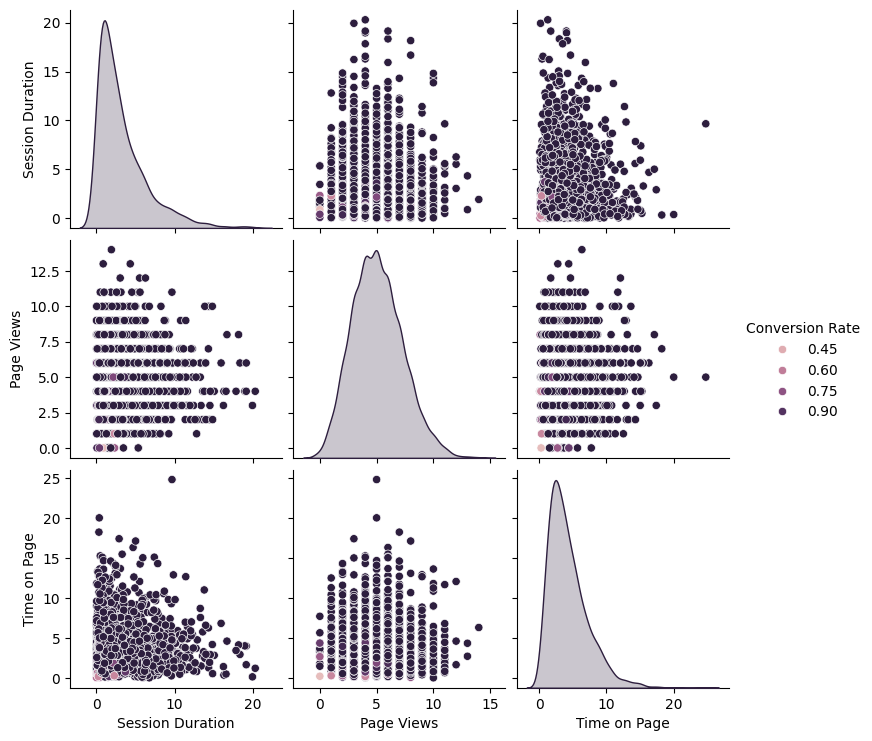

In [14]:
sns.pairplot(web, vars=["Session Duration", "Page Views", "Time on Page"], hue="Conversion Rate")
plt.show()
#This will show if longer sessions and more page views increase conversions.

       3. Bounce Rate Analysis

In [23]:
web["Bounce Rate"] = web["Bounce Rate"] / 100
web["Bounce Rate"] = web["Bounce Rate"].round(2)
web["Bounce Rate"].head()

0    23.07
1    39.10
2    39.80
3    18.05
4    29.15
Name: Bounce Rate, dtype: float64

In [24]:
web["Bounce Rate"].describe()

count    2000.000000
mean       28.476670
std        15.978121
min         0.790000
25%        16.200000
50%        26.635000
75%        38.857500
max        84.490000
Name: Bounce Rate, dtype: float64

In [25]:
#Bounce rate correlation. This helps determine which traffic sources have high bounce rates.
web.groupby("Traffic Source")["Bounce Rate"].mean().sort_values(ascending=False)

Traffic Source
Social      29.626766
Paid        29.602407
Direct      28.458056
Organic     28.182214
Referral    26.630399
Name: Bounce Rate, dtype: float64

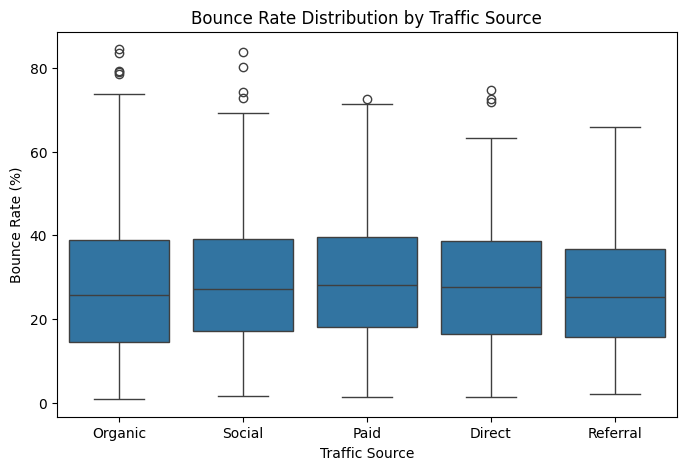

In [26]:
plt.figure(figsize=(8,5))
sns.boxplot(x="Traffic Source", y="Bounce Rate", data=web)
plt.title("Bounce Rate Distribution by Traffic Source")
plt.ylabel("Bounce Rate (%)")
plt.show()

      4. Returning Visitors vs. New Visitors

In [30]:
#Goal: Determine how previous visits affect user engagement and conversion rates.
web.groupby("Previous Visits")["Conversion Rate"].mean() * 100 

Previous Visits
0     96.754001
1     97.750857
2     98.446772
3     99.016685
4     98.788083
5     99.493659
6     99.329027
7    100.000000
8    100.000000
9    100.000000
Name: Conversion Rate, dtype: float64

      5.Correlations Between Metrics

In [34]:
#Goal: Identify relationships between different metrics.
selected_columns = ["Page Views", "Session Duration", "Bounce Rate", "Conversion Rate", "Time on Page"]
numeric_web = web[selected_columns]

correlation_matrix = numeric_web.corr()
print(correlation_matrix)

                  Page Views  Session Duration  Bounce Rate  Conversion Rate  \
Page Views          1.000000         -0.012788     0.030224         0.126635   
Session Duration   -0.012788          1.000000    -0.015930         0.177798   
Bounce Rate         0.030224         -0.015930     1.000000        -0.049045   
Conversion Rate     0.126635          0.177798    -0.049045         1.000000   
Time on Page        0.023941         -0.013985     0.039341         0.229669   

                  Time on Page  
Page Views            0.023941  
Session Duration     -0.013985  
Bounce Rate           0.039341  
Conversion Rate       0.229669  
Time on Page          1.000000  


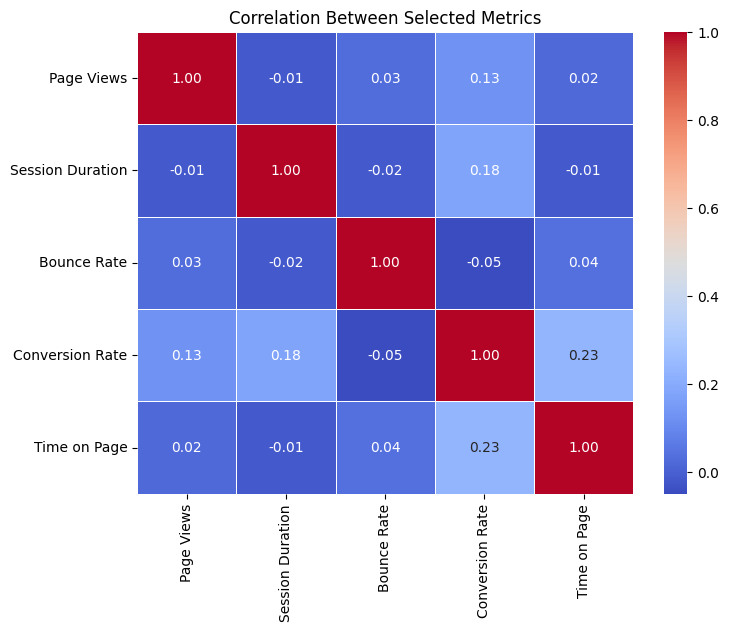

In [35]:
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Between Selected Metrics")
plt.show()
